## MultiLayer Perceptron

In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

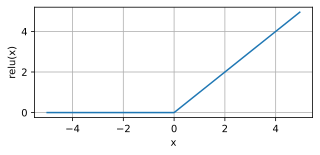

In [3]:
# Plotting the ReLU activation function

x = torch.arange(-5.0, 5.0, 0.05, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2))

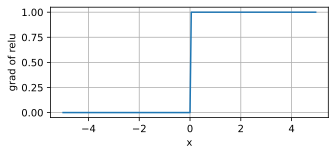

In [4]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2))

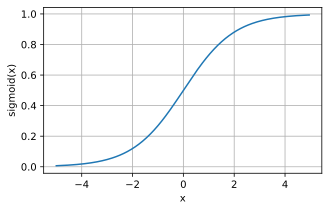

In [5]:
# Sigmoid Function

y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 3))

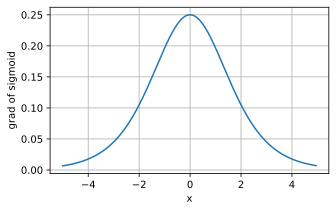

In [6]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 3))

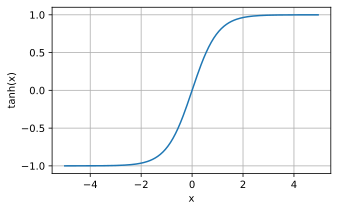

In [7]:
# Tanh function

y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 3))

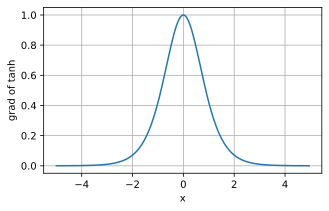

In [8]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 3))

# Implementation of Multilayer Perceptron From Scratch

In [9]:
import torch.nn as nn

class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

In [12]:
# Implementation of ReLU activation

def relu(x):
    a = torch.zeros_like(x)
    return torch.max(x, a)

# Implementing our model
@d2l.add_to_class(MLPScratch)
def forward(self, x):
    x = x.reshape(-1, self.num_inputs)
    h = relu(torch.matmul(x, self.W1) + self.b1)
    return torch.matmul(h, self.W2) + self.b2

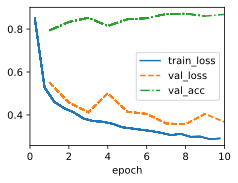

In [13]:
# Training the model for MLP

model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=64)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

# Concise Implementation of MLP

In [14]:
# Using high level APIs, we can implement MLPs even more concisely

class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens), nn.ReLU(), nn.LazyLinear(num_outputs))

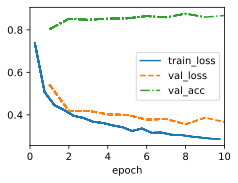

In [15]:
# Finally training
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

Reached the SOTA of the late 1980s